# ChatGPT

You might have seen the news reports in December about this new machine learning tool from a company called OpenAI, the tool is [ChatGPT](https://openai.com/blog/chatgpt/).

## Here is what I got when I asked ChatGPT to make me a neural network without usingh Keras, TensorFlow or PyTorch 

I asked:
> Can you write code for neural network without using keras or PyTorch or tensorflow or any other prepackaged code?

ChatGPT replied:
>Certainly! Here is an example of how you can build a simple neural network from scratch in Python using only NumPy, a popular numerical computing library. This network will have a single hidden layer with three units, and an output layer with a single unit. We will use the sigmoid activation function for the hidden layer and the unit step function for the output layer.




In [6]:
import numpy as np

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # initialize weights randomly with mean 0
        self.W1 = np.random.randn(input_size, hidden_size)
        self.W2 = np.random.randn(hidden_size, output_size)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def forward(self, X):
        # forward propagation through our network
        self.z = np.dot(X, self.W1)
        self.a = self.sigmoid(self.z)
        self.z2 = np.dot(self.a, self.W2)
        y_hat = self.sigmoid(self.z2)
        return y_hat

# create a neural network
network = NeuralNetwork(2, 3, 1)

# input data
X = np.array([[1, 2], [3, 4], [5, 6]])

# make predictions
predictions = network.forward(X)
print(predictions)


[[0.51584096]
 [0.48744376]
 [0.47711443]]


ChatGPT describes the code like this (but with better formatting):
> This code defines a NeuralNetwork class with three methods: __init__, sigmoid, and forward. The __init__ method is the constructor of the class and is called when you create a new instance of the class. It initializes the weights W1 and W2 of the network randomly with mean 0. The sigmoid method defines the sigmoid activation function, which takes a matrix of activations x and returns the sigmoid of x. The forward method implements the forward propagation of the network, which involves performing a dot product of the input data X with the weights W1, applying the sigmoid activation function to the result, performing a dot product of the activations with the weights W2, and applying the sigmoid activation function to the final result.

> I hope this helps! Let me know if you have any questions.

In [9]:
# Now lets plot our network
print("X.shape",X.shape)
print("predictions.shape",predictions.shape)
x1=np.linspace(0,10,50)
x2=np.linspace(0,10,50)
x1v, x2v = np.meshgrid(x1, x2)

#x1v and x2v are 2-D arrays where each columnin x1v haveing the same value and each row in x2v having the same value
x1flat=x1v.flatten()  #Flatten the 50x50 2-D array into a 2500 element 1d array
x2flat=x2v.flatten()
Nparallel=np.shape(x1flat)[0]  #This is a numpy way of getting the length of the first dimension of an array
print(np.shape(x1flat))  #Just calling np.shape returns a tuple
print("Nparallel:",Nparallel) #But the first element of that tuple is the length
xTest=np.zeros((Nparallel,2)) # Now need to create the input, which will need to have a shape which is (2500,2)
xTest[:,0]=x1flat # fill first component (index 0)
xTest[:,1]=x2flat # fill second component
print("np.shape(xTest):",np.shape(xTest))


X.shape (3, 2)
predictions.shape (3, 1)
(2500,)
Nparallel: 2500
np.shape(xTest): (2500, 2)


z.shape: (2500, 1)


Text(0, 0.5, 'x_2')

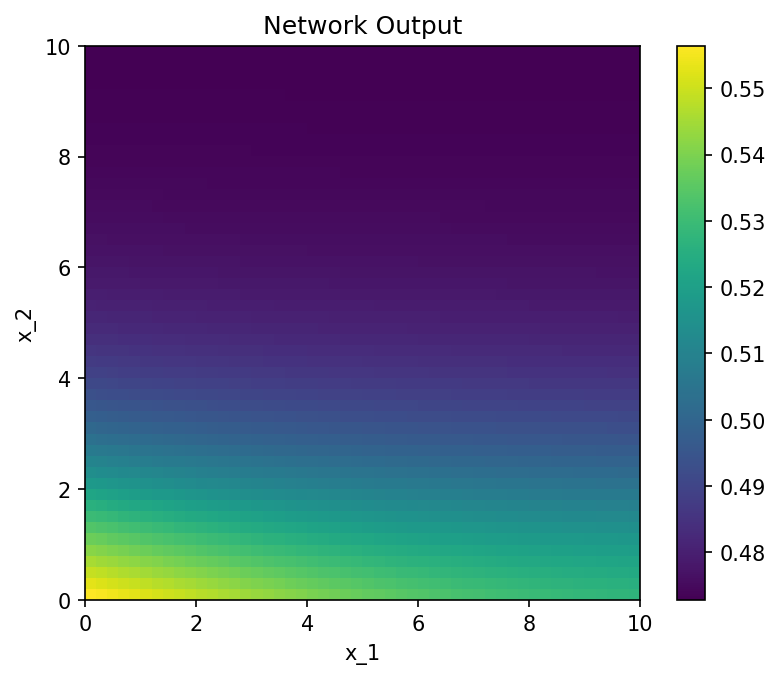

In [14]:
#Now we can evaluate our network on all 2500 pairs of x1 and x2 in parallel
z=network.forward(xTest)
print("z.shape:",np.shape(z))


#Now to plot it
#So now we will have our first bit of code
import numpy as np  #import the numpy library as np
import matplotlib.pyplot as plt #import the pyplot library as plt
import matplotlib.style #Some style nonsense
import matplotlib as mpl #Some more style nonsense

#Set default figure size
#mpl.rcParams['figure.figsize'] = [12.0, 8.0] #Inches... of course it is inches
mpl.rcParams["legend.frameon"] = False
mpl.rcParams['figure.dpi']=150 # dots per inch

z2d=z.reshape((len(x1),len(x2)))  #Reshape the 2500,1 array into one which is 50x50
#Now plot the results
fig, ax = plt.subplots() #Get the fig and ax objects for the plot 
im=ax.matshow(z2d,origin='lower',extent=(0,10,0,10)) #Plot the output z as a colormap with the origin in the bottom left
cb = fig.colorbar(im) #Get the colorbar for the range of z values
ax.xaxis.set_ticks_position('bottom') #Move the x-axis to the bottom (personal preference)
ax.set_title('Network Output') #Give our plot some title
ax.set_xlabel("x_1") #Slightly uninteresting labels
ax.set_ylabel("x_2")

# Network training
Next I asked ChatGPT about how to train a network and got the following code and description.

> To train a neural network, you need to minimize the error between the predicted outputs and the true labels. One way to do this is through backpropagation, which is an algorithm that adjusts the weights of the network in order to reduce the error.

> Here is an example of how you can modify the NeuralNetwork class to include a method for backpropagation:

In [15]:
import numpy as np

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # initialize weights randomly with mean 0
        self.W1 = np.random.randn(input_size, hidden_size)
        self.W2 = np.random.randn(hidden_size, output_size)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def forward(self, X):
        # forward propagation through our network
        self.z = np.dot(X, self.W1)
        self.a = self.sigmoid(self.z)
        self.z2 = np.dot(self.a, self.W2)
        y_hat = self.sigmoid(self.z2)
        return y_hat

    def sigmoid_derivative(self, x):
        # derivative of sigmoid function
        return x * (1 - x)

    def train(self, X, y, epochs):
        for epoch in range(epochs):
            # forward propagation
            y_hat = self.forward(X)

            # compute loss
            loss = y - y_hat

            # backpropagation
            d_W2 = np.dot(self.a.T, loss * self.sigmoid_derivative(y_hat))
            d_W1 = np.dot(X.T, np.dot(loss * self.sigmoid_derivative(y_hat), self.W2.T) * self.sigmoid_derivative(self.a))

            # update weights
            self.W1 += d_W1
            self.W2 += d_W2


> The train method takes as input the training data X, the labels y, and the number of epochs to train for. An epoch is a complete pass through the training data. During each epoch, the method performs forward propagation to make predictions, computes the loss between the predictions and the labels, and performs backpropagation to adjust the weights of the network. The weights are updated using the gradient descent algorithm, which adjusts the weights in the direction that minimizes the loss.

> To train the network, you can call the train method and pass in your training data and labels:



In [16]:
# input data
X = np.array([[1, 2], [3, 4], [5, 6]])
y = np.array([[0], [1], [1]])

# create a neural network
network = NeuralNetwork(2, 3, 1)

# train the network
network.train(X, y, epochs=10000)


z.shape: (2500, 1)


Text(0, 0.5, 'x_2')

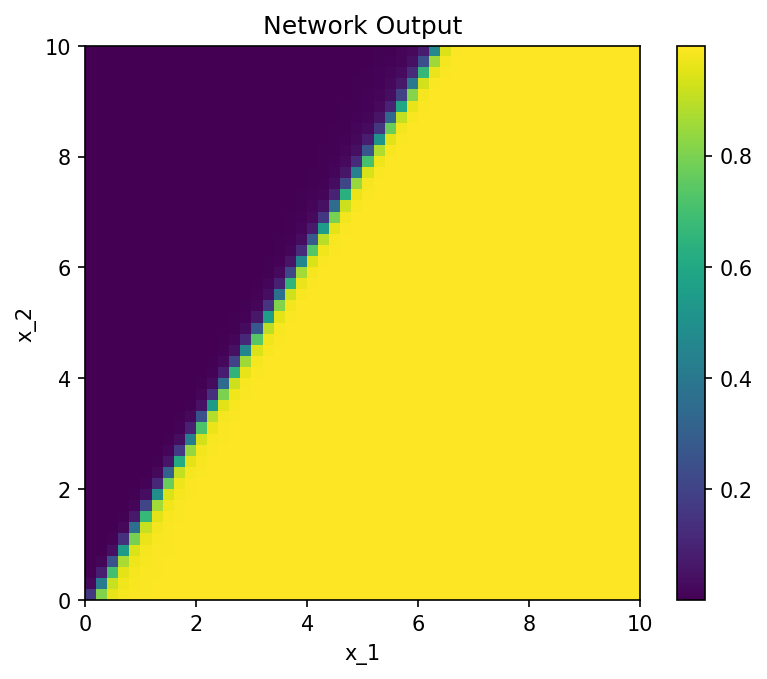

In [51]:
#Now we can evaluate our network on all 2500 pairs of x1 and x2 in parallel
z=network.forward(xTest)
print("z.shape:",np.shape(z))


#Now to plot it
#So now we will have our first bit of code
import numpy as np  #import the numpy library as np
import matplotlib.pyplot as plt #import the pyplot library as plt
import matplotlib.style #Some style nonsense
import matplotlib as mpl #Some more style nonsense

#Set default figure size
#mpl.rcParams['figure.figsize'] = [12.0, 8.0] #Inches... of course it is inches
mpl.rcParams["legend.frameon"] = False
mpl.rcParams['figure.dpi']=150 # dots per inch

z2d=z.reshape((len(x1),len(x2)))  #Reshape the 2500,1 array into one which is 50x50
#Now plot the results
fig, ax = plt.subplots() #Get the fig and ax objects for the plot 
im=ax.matshow(z2d,origin='lower',extent=(0,10,0,10)) #Plot the output z as a colormap with the origin in the bottom left
cb = fig.colorbar(im) #Get the colorbar for the range of z values
ax.xaxis.set_ticks_position('bottom') #Move the x-axis to the bottom (personal preference)
ax.set_title('Network Output') #Give our plot some title
ax.set_xlabel("x_1") #Slightly uninteresting labels
ax.set_ylabel("x_2")

## What were you expecting this to look like?

Why do we end up with this rather dull looking thing once we have 'trained' our network? It is because we have only trained the network with 3 pieces of information. The input point we gave earlier was:
```
# input data
X = np.array([[1, 2], [3, 4], [5, 6]])
y = np.array([[0], [1], [1]])
```

So in terms of $x_1$ and $x_2$ we have only defined the output at 3 points:
```
(1,2) == 0
(3,4) == 1
(5,6) == 1
```

This means at least two things:
   1. We are not giving our network very much information about the shape we wantin the $x_1$,$x_2$ 2D-plane.
   2. Each loop we are giving it the same information... so this is not going to be a very quick or productive training.

In [48]:
# What is the training doing?
# Let's start with a new blank network
network2 = NeuralNetwork(2, 3, 1)

#Now we can evaluate how close this network comes to our desired output [0,1,1]
# Each time we run the above line we create a new network2 object with different random numbers
y_hat = network2.forward(X)
print(y_hat)


[[0.47081307]
 [0.46302812]
 [0.45882802]]


In [49]:
# But to train we want to run over the same network many times
Nepoch=10000
# Let's create a temporary array for storing the values of the 'loss' which is how far away our network is from what we want it to be
losses=np.zeros([Nepoch+1,3])

#Calculate the initial loss
loss=y-network2.forward(X)
print(loss)
# Put it at the start of the loss array
losses[0]=loss.reshape(3)

#We've moved the loop over epochs outside the train function so we can easily capture the loss values
for epoch in range(Nepoch):
    network2.train(X, y, epochs=1) #One training epoch at a time
    loss=y-network2.forward(X) #The loss is always got the same way but after each step in training the network will give different outputs
    losses[epoch+1]=loss.reshape(3) #Need to reshape from 3x1 to just 3 to fill the array
    


[[-0.47081307]
 [ 0.53697188]
 [ 0.54117198]]


Text(0, 0.5, 'Loss (Target - Network Output)')

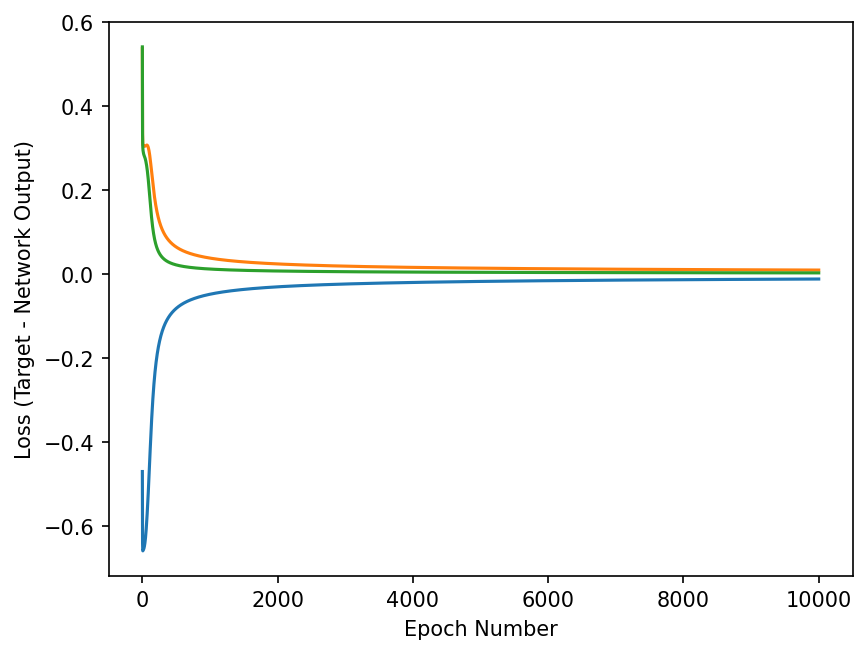

In [52]:
#Now let's plot the 3 componets of the losses
fig, ax = plt.subplots() #Get the fig and ax objects for the plot 
ax.plot(range(Nepoch+1),losses)
ax.set_xlabel("Epoch Number")
ax.set_ylabel("Loss (Target - Network Output)")